<a href="https://colab.research.google.com/github/ChayanitBhateja/MyMLLearning/blob/master/CNN_CLassification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Model 

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [4]:
# Standardizing x_train as 255 is the maximum value in arrays
# dividing will change the values to 0-1
x_train, x_test = x_train / 255, x_test / 255

In [8]:
# Target is 2d...so to convert it into 1d lets flatten it..
y_train, y_test = y_train.flatten(), y_test.flatten()

In [10]:
# Classes of target variable...
K = len(set(y_train))
print(K)

10


In [11]:
# Creating CNN
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2, activation='relu')(x)
x = Conv2D(128,(3,3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i, x)

In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5562 - accuracy: 0.4304 - val_loss: 1.2634 - val_accuracy: 0.5454
Epoch 2/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2692 - accuracy: 0.5437 - val_loss: 1.1518 - val_accuracy: 0.5906
Epoch 3/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1448 - accuracy: 0.5900 - val_loss: 1.0611 - val_accuracy: 0.6164
Epoch 4/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0607 - accuracy: 0.6210 - val_loss: 1.0127 - val_accuracy: 0.6383
Epoch 5/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9926 - accuracy: 0.6463 - val_loss: 0.9673 - val_accuracy: 0.6598
Epoch 6/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9311 - accuracy: 0.6690 - val_loss: 0.8872 - val_accuracy: 0.6917
Epoch 7/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8758 - accuracy: 0.6895 - val_loss: 0.9484 -

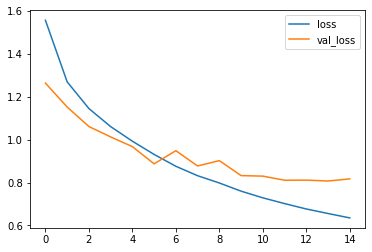

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

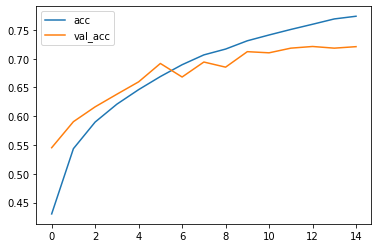

In [14]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()